In [122]:
import pandas as pd
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler

In [123]:
import warnings

warnings.filterwarnings("ignore")

In [124]:
df= pd.read_csv("C:/Users/Dell/Desktop/jp1/tips (data for regression problem).csv")
df.head()


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


## distributions of numeric features

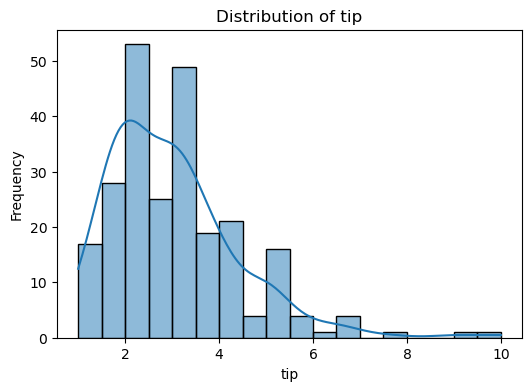

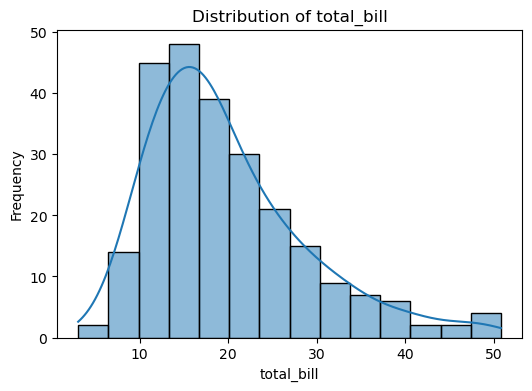

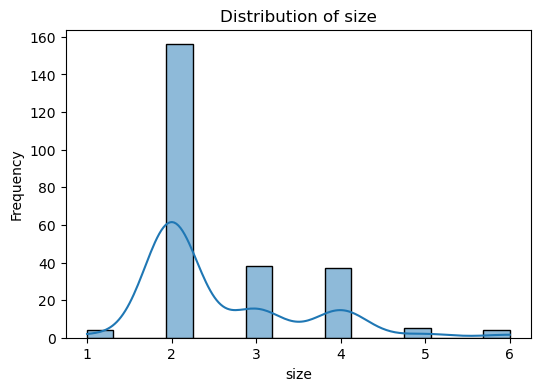

In [126]:
numeric_features = ['tip', 'total_bill' , 'size' ]

for feature in numeric_features:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

### for categorical features 

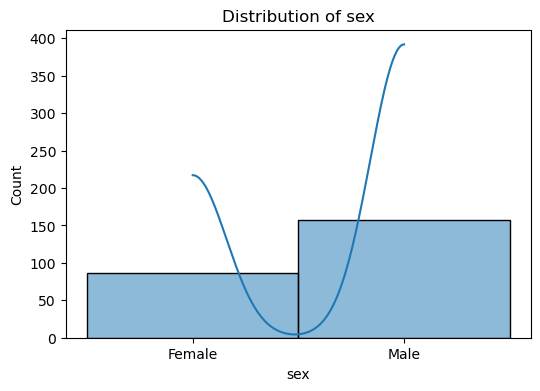

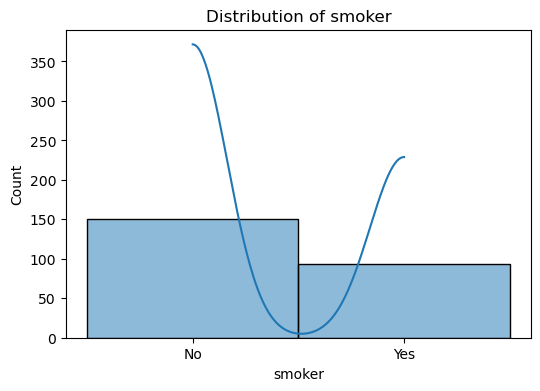

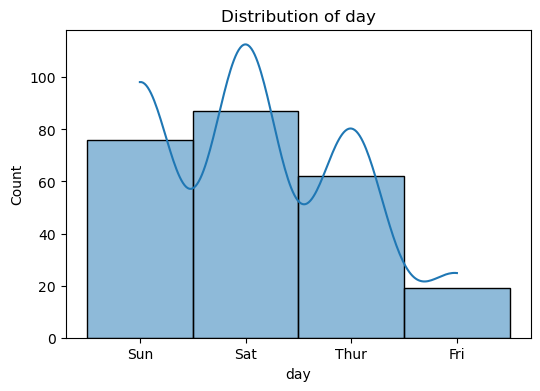

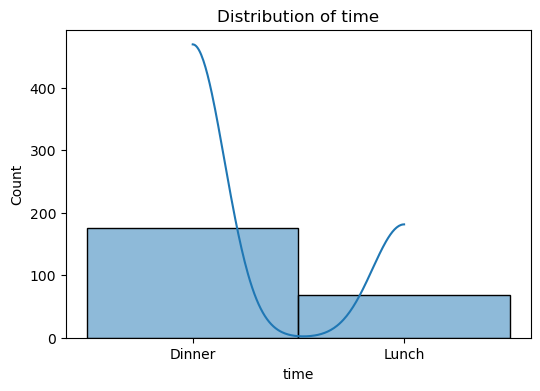

In [127]:
categorical_features =['sex' ,'smoker' ,'day' ,'time']

for feature in categorical_features:
    plt.figure(figsize =(6,4))
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.show

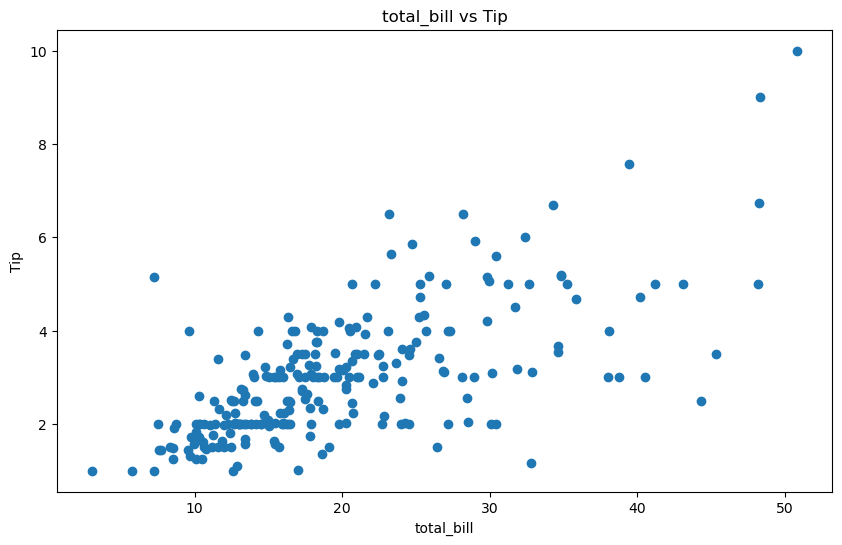

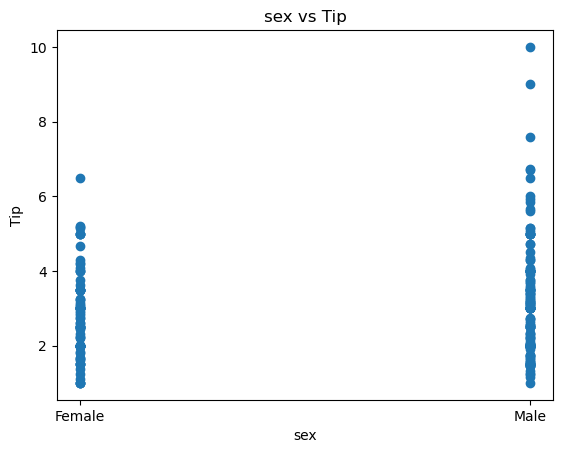

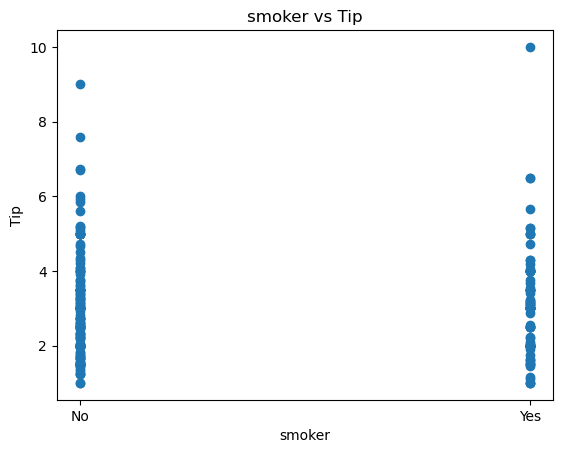

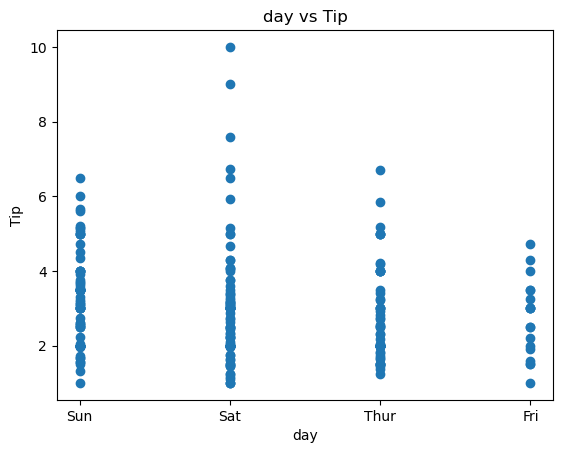

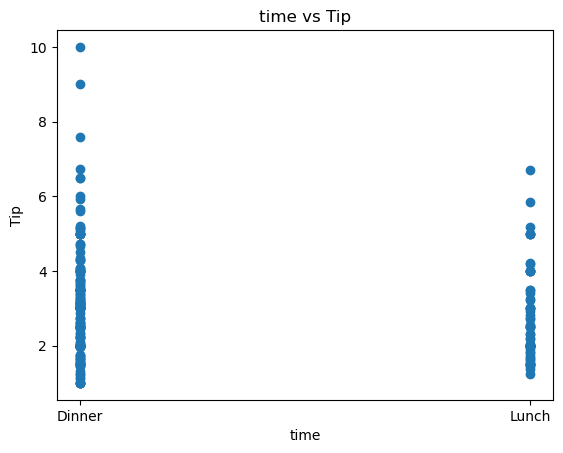

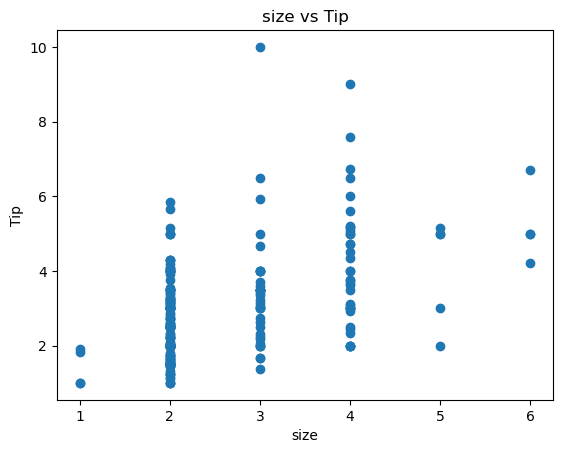

In [128]:
df_data = df.drop(columns=['tip'])
df_target = df['tip']

plt.figure(figsize=(10, 6))
# Scatter Plot
for i in range(0,6):
    plt.scatter(df_data.iloc[:,i], df_target)
    plt.xlabel(df_data.columns[i])
    plt.ylabel('Tip')
    plt.title(df_data.columns[i] + ' vs Tip')
    plt.show()

* We notice that a higher amount of tip corresponds to a higher total bill

* We also notice that the tip amount is higher for the dinner time compared to the lunch time

* the lowest amount of tips arereceived on the Friday

* The highest variance in tips are received on the Saturday

* The highest amount of tips are received on the Sunday

* Men tip noticably more than women do

* Smokers and non-smokers tip about equally

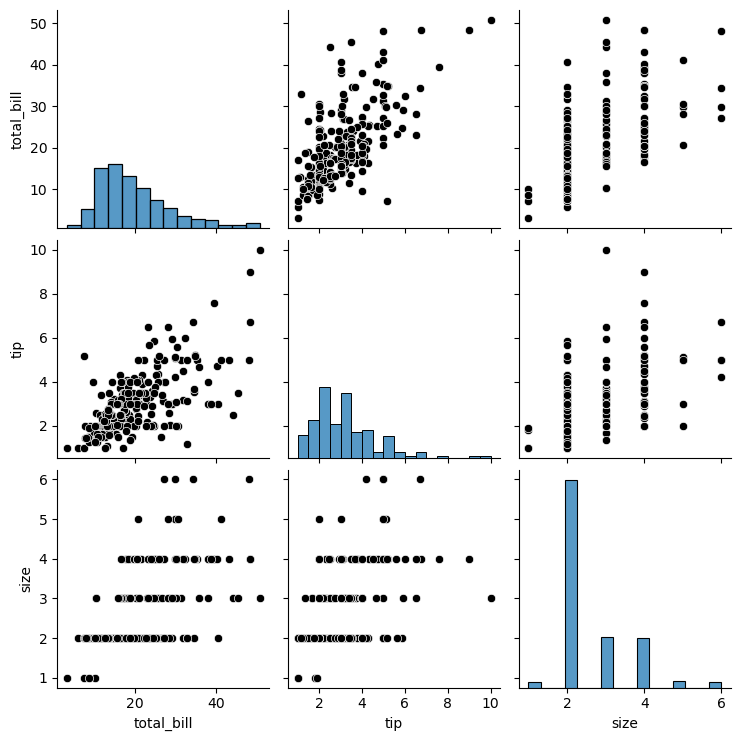

In [147]:
sns.pairplot(df, plot_kws={'color': 'black'})


<Axes: >

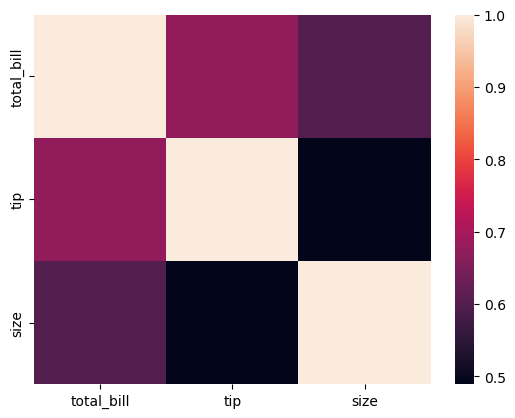

In [130]:
# Convert variable datatypes to get correlation matrix
df_corr = df[['total_bill', 'tip', 'size']].copy()
corr = df_corr.corr()
sns.heatmap(corr)

### Noticable correlation is found between Total bill and tip and also between size and tip

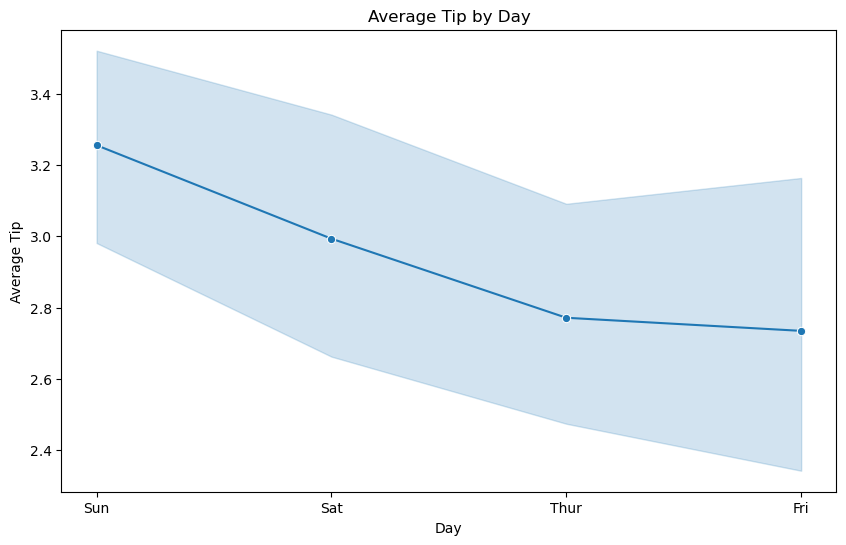

In [131]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x="day", y="tip", estimator="mean", marker="o")
plt.title("Average Tip by Day")
plt.xlabel("Day")
plt.ylabel("Average Tip")
plt.show()

In [132]:
X = df[['total_bill', 'sex', 'smoker', 'day', 'time', 'size']]
y = df['tip']

In [133]:
X =pd.get_dummies( X , drop_first=True )  #one hot encoding 

In [134]:
X_train,X_test,y_train, y_test = train_test_split(X,y ,test_size=0.2 , random_state= 42)


In [135]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

Linear Regression

In [136]:


linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_linear = linear_model.predict(X_test)
print("Linear Regression RMSE:", mean_squared_error(y_test, y_pred_linear, squared=False))
print("Linear Regression R^2 Score:", r2_score(y_test, y_pred_linear))

Linear Regression RMSE: 0.8386635807900629
Linear Regression R^2 Score: 0.43730181943482516


Ridge Regression 

In [137]:
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)
print("Ridge Regression RMSE:", mean_squared_error(y_test, y_pred_ridge, squared=False))
print("Ridge Regression R^2 Score:", r2_score(y_test, y_pred_ridge))

Ridge Regression RMSE: 0.8371067562274287
Ridge Regression R^2 Score: 0.4393889716178484


lasso regression 

In [138]:
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)
print("Lasso Regression RMSE:", mean_squared_error(y_test, y_pred_lasso, squared=False))
print("Lasso Regression R^2 Score:", r2_score(y_test, y_pred_lasso))


Lasso Regression RMSE: 0.768669542129225
Lasso Regression R^2 Score: 0.5273068720881755


Decision Tree Regression

In [139]:


# Initialize and train the model
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_tree = tree_model.predict(X_test)
print("Decision Tree RMSE:", mean_squared_error(y_test, y_pred_tree, squared=False))
print("Decision Tree R^2 Score:", r2_score(y_test, y_pred_tree))

Decision Tree RMSE: 1.120354353564541
Decision Tree R^2 Score: -0.004178121600921791


Random Forest Regression (Ensemble)

In [140]:
from sklearn.ensemble import RandomForestRegressor

# Initialize and train the model
forest_model = RandomForestRegressor(n_estimators=100, random_state=42)
forest_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_forest = forest_model.predict(X_test)
print("Random Forest RMSE:", mean_squared_error(y_test, y_pred_forest, squared=False))
print("Random Forest R^2 Score:", r2_score(y_test, y_pred_forest))

Random Forest RMSE: 0.9589953153680993
Random Forest R^2 Score: 0.2642455218065466


SVR

In [141]:
from sklearn.svm import SVR

# Initialize and train the model (standardize first for SVR)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svr_model = SVR(kernel='rbf')
svr_model.fit(X_train_scaled, y_train)

# Predict and evaluate
y_pred_svr = svr_model.predict(X_test_scaled)
print("SVR RMSE:", mean_squared_error(y_test, y_pred_svr, squared=False))
print("SVR R^2 Score:", r2_score(y_test, y_pred_svr))

SVR RMSE: 0.8803059183848455
SVR R^2 Score: 0.3800349801024776


KNN

In [142]:
from sklearn.neighbors import KNeighborsRegressor

# Initialize and train the model
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)

# Predict and evaluate
y_pred_knn = knn_model.predict(X_test_scaled)
print("KNN RMSE:", mean_squared_error(y_test, y_pred_knn, squared=False))
print("KNN R^2 Score:", r2_score(y_test, y_pred_knn))

KNN RMSE: 0.9502297466552874
KNN R^2 Score: 0.27763418350081626


### Best model is the one with highest R^2 and lowest MSE, so in this case, it is Lasso regression

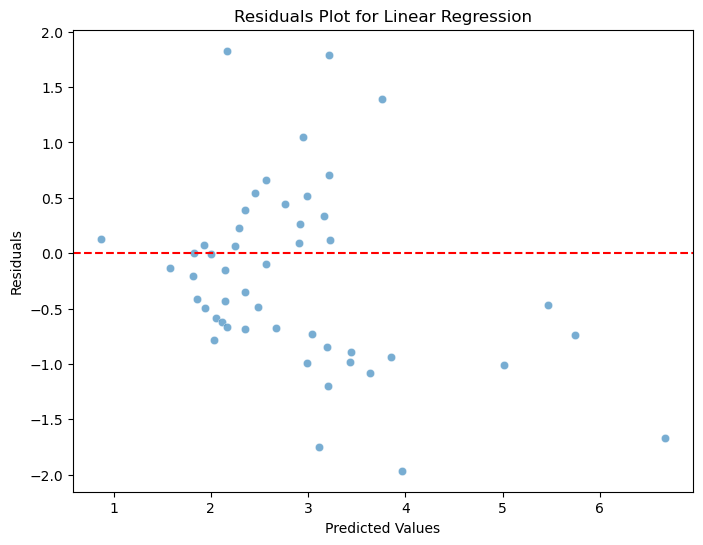

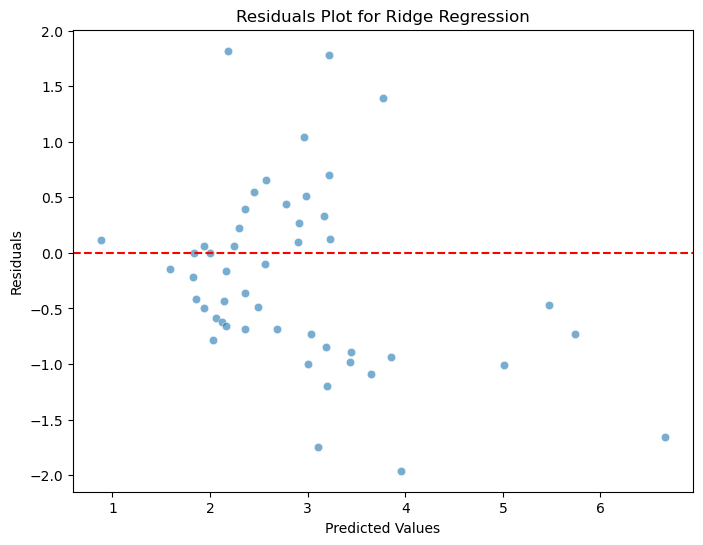

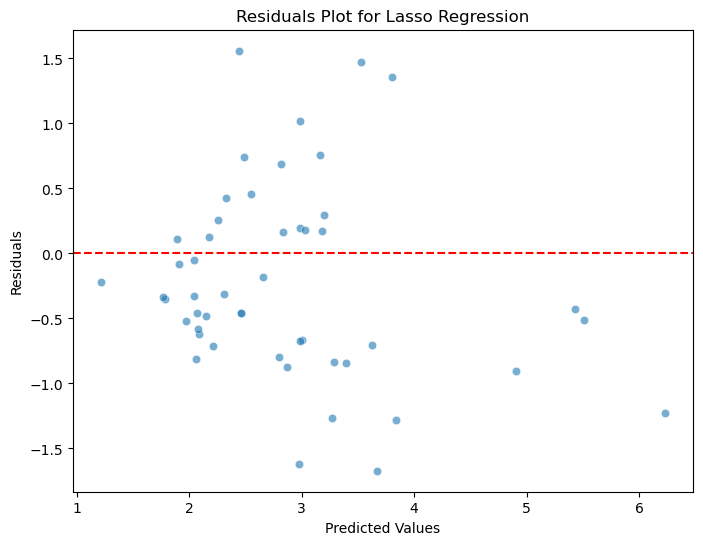

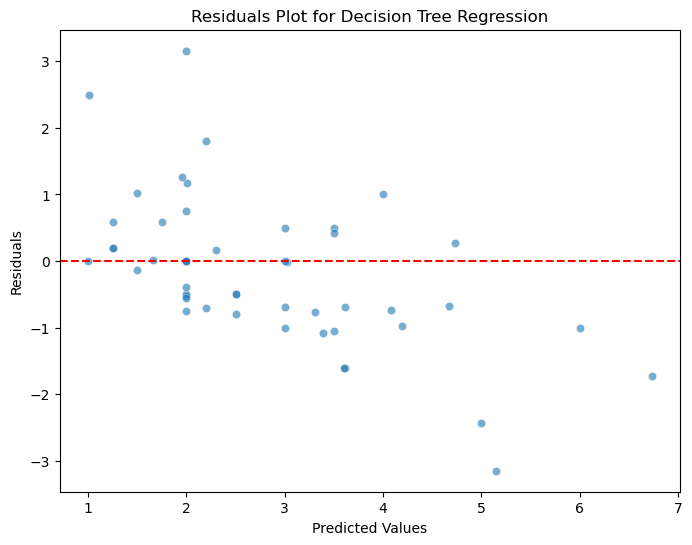

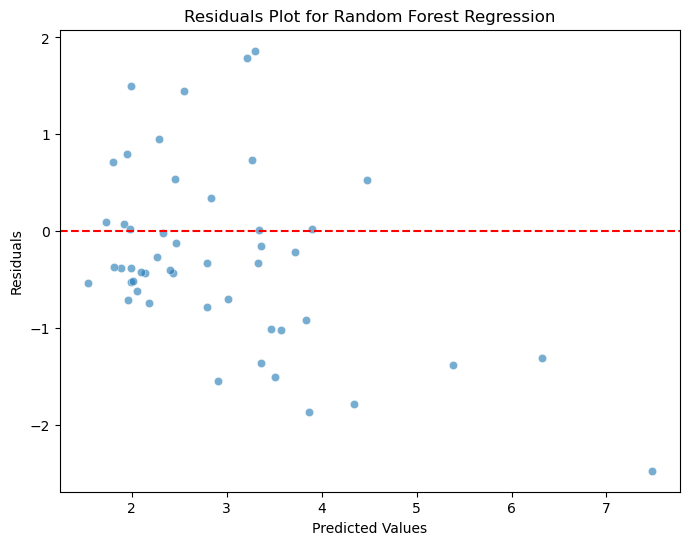

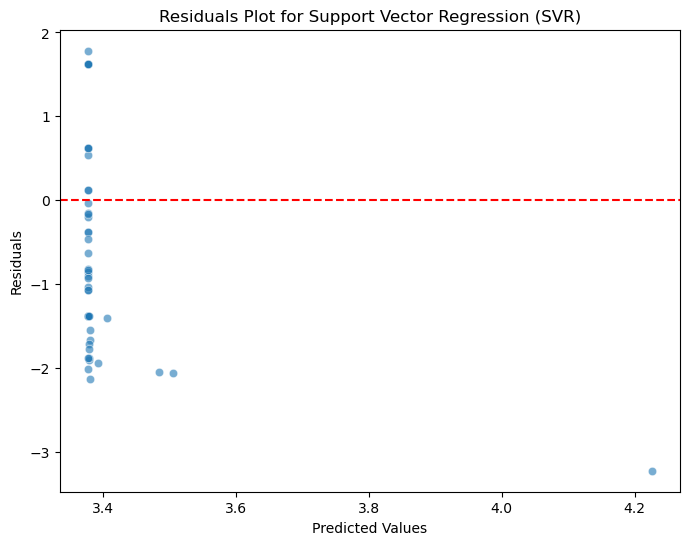

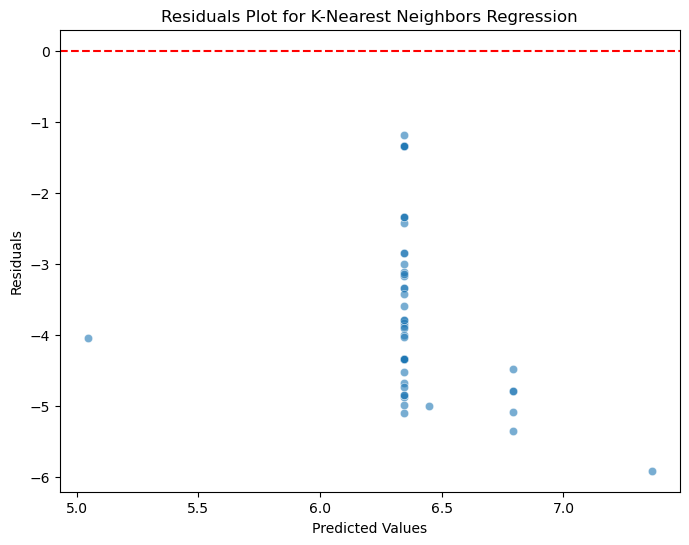

In [143]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define a helper function to plot residuals
def plot_residuals(y_test, y_pred, model_name):
    residuals = y_test - y_pred
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=y_pred, y=residuals, alpha=0.6)
    plt.axhline(0, color='red', linestyle='--')
    plt.xlabel("Predicted Values")
    plt.ylabel("Residuals")
    plt.title(f"Residuals Plot for {model_name}")
    plt.show()

# 1. Linear Regression
y_pred_lr =  linear_model.predict(X_test)
plot_residuals(y_test, y_pred_lr, "Linear Regression")

# 2. Ridge Regression
y_pred_ridge = ridge_model.predict(X_test)
plot_residuals(y_test, y_pred_ridge, "Ridge Regression")

# 3. Lasso Regression
y_pred_lasso = lasso_model.predict(X_test)
plot_residuals(y_test, y_pred_lasso, "Lasso Regression")

# 4. Decision Tree Regression
y_pred_tree =tree_model.predict(X_test)
plot_residuals(y_test, y_pred_tree, "Decision Tree Regression")

# 5. Random Forest Regression
y_pred_forest = forest_model.predict(X_test)
plot_residuals(y_test, y_pred_forest, "Random Forest Regression")

# 6. Support Vector Regression
y_pred_svr = svr_model.predict(X_test)
plot_residuals(y_test, y_pred_svr, "Support Vector Regression (SVR)")

# 7. K-Nearest Neighbors Regression
y_pred_knn = knn_model.predict(X_test)
plot_residuals(y_test, y_pred_knn, "K-Nearest Neighbors Regression")

from the above, we notice that desicion tree have the least residuals, which means they might be overfitting the data.

# Conclusion


The business should target their best servie to customers on the Sundays and increase quality of services on the Friday to make the tip rate higher.
The business should also focus on the dinner time to increase the tip rate
Higher number of people in a table should be given higher priority as they tend to tip more
The business should also focus on the total bill as it has a high correlation with the tip amount